In [4]:
%matplotlib notebook
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [5]:
"""
  
"""
df = pd.read_csv('C:/Users/JoSe/Documents/Sep/Mineria/labs/LabTree/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
d1 = {'female':0,'male':1}
df['sex'] = df['sex'].map(d1)
d2 = {'yes':1,'no':0}
df['smoker']= df['smoker'].map(d2)
d3={'southwest':0,'southeast':1,'northwest':2,'northeast':3}
df['region'] = df['region'].map(d3)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [7]:
features = ['age','sex','bmi','region']
X = df[features]

In [8]:
labels = ['smoker']
y = df[labels]

In [9]:
print(X,y,sep="\n\n")

      age  sex     bmi  region
0      19    0  27.900       0
1      18    1  33.770       1
2      28    1  33.000       1
3      33    1  22.705       2
4      32    1  28.880       2
...   ...  ...     ...     ...
1333   50    1  30.970       2
1334   18    0  31.920       3
1335   18    0  36.850       1
1336   21    0  25.800       0
1337   61    0  29.070       2

[1338 rows x 4 columns]

      smoker
0          1
1          0
2          0
3          0
4          0
...      ...
1333       0
1334       0
1335       0
1336       0
1337       1

[1338 rows x 1 columns]


In [10]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X,y)

In [12]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


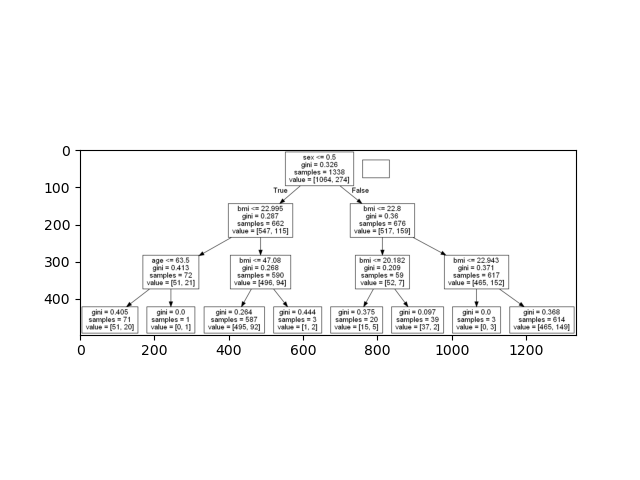

<function matplotlib.pyplot.show(block=None)>

In [13]:
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show

In [14]:
y_pred = dtree.predict(X)
print(y_pred)

[0 0 0 ... 0 0 0]


In [15]:
matrizConfu = confusion_matrix(y, y_pred)

In [16]:
cm_df = pandas.DataFrame(matrizConfu,
                     index = ['Fuma', 'No Fuma'], 
                     columns = ['Fuma', 'No Fuma'])

<IPython.core.display.Javascript object>


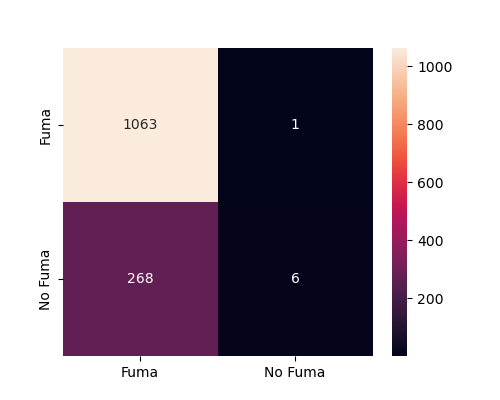

In [17]:
plt.figure(figsize=(5,4))
sn.heatmap(cm_df, annot=True,fmt='g')
plt.show()